In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline

# Life Game

In [7]:
# Core Code

import numpy as np
import matplotlib as mpl
import PIL
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import time

# Game Configuration
Config = {
    "width": 60,
    "height": 60,
    "resolution": 60,
    "theme": ["white", "black"],
    "initialization": {
        "spawnCount": 1800
    },
}

# DPI configuration
mpl.rcParams['figure.dpi'] = Config["resolution"]

# Stores an array of file names of saved images (per frame)
ImageStream = []

# Randomize every board
np.random.seed(int(time.time()))

# 1 is alive, 0 is dead, create initial canvas with spawnCount config
Canvas = np.concatenate(
    (
        np.ones(Config["initialization"]["spawnCount"]),
        np.zeros(Config["width"] * Config["height"] - Config["initialization"]["spawnCount"])
    ),
    axis=None
)
np.random.shuffle(Canvas)
Canvas = Canvas.reshape(Config["height"], Config["width"])

# Color map used by matplotlib
Cmap = ListedColormap(Config["theme"])

# Initialize the board
def initialize():
    global Canvas
    global Cmap
    global ImageStream
    Canvas = np.concatenate(
        (
            np.ones(Config["initialization"]["spawnCount"]),
            np.zeros(Config["width"] * Config["height"] - Config["initialization"]["spawnCount"])
        ),
        axis=None
    )
    np.random.shuffle(Canvas)
    Canvas = Canvas.reshape(Config["height"], Config["width"])
    Cmap = ListedColormap(["white", "black"])
    ImageStream = []

# Do once
initialize()

FPSTimer = 0

def fpsAdd(dt):
    global FPSTimer
    FPSTimer += dt
def fpsShow():
    global FPSTimer
    print("FPS:", 1/FPSTimer)
    FPSTimer = 0
# Decorators for performance analysis
def draw_performance(func):
    def inner():
        print(FPSTimer)
        beginTime = time.perf_counter()
        output = func()
        endTime = time.perf_counter()
        fpsAdd(endTime - beginTime)
        fpsShow()
        return output
    return inner
def save_performance(func):
    def inner(arg):
        beginTime = time.perf_counter()
        output = func(arg)
        endTime = time.perf_counter()
        fpsAdd(endTime - beginTime)
        fpsShow()
        return output
    return inner
def update_performance(func):
    def inner(arg):
        beginTime = time.perf_counter()
        output = func(arg)
        endTime = time.perf_counter()
        fpsAdd(endTime - beginTime)
        return output
    return inner

# Simply draw the function
@draw_performance
def draw() -> bool:
    plt.grid(False)
    plt.axis('off')
    plt.imshow(Canvas, cmap = Cmap)
    plt.show()
    return True

# Save the image to file
@save_performance
def save(fileName) -> bool:
    plt.clf()
    plt.grid(False)
    plt.axis('off')
    plt.imshow(Canvas, cmap = Cmap)
    plt.savefig(fileName, transparent=True)
    ImageStream.append(fileName)
    return True

# Updates the Canvas
@update_performance
def update(canvas, frameCount = 1):
    updatedCanvas = canvas.copy()
    def computeLife(canvas, xId, yId):
        state = canvas[xId, yId] # Current status
        s = np.sum(
            canvas[
                max(0, xId-1):min(Config["height"]+1, xId+2),
                max(0, yId-1):min(yId+2, Config["width"] + 1)
            ]
        ) # 3x3 grid including center
        if state: # Previously alive
            return s - state == 2 or s - state == 3
        else: # Previously dead
            return s == 3
    # Basic iteration
    for xId in range(Config["height"]):
        for yId in range(Config["width"]):
            updatedCanvas[xId, yId] = computeLife(canvas, xId, yId)
    return updatedCanvas

0


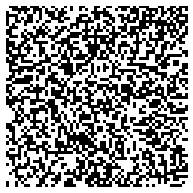

FPS: 14.156995245293269
0.0427869790000841


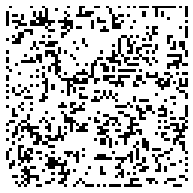

FPS: 10.824158226430566
0.041751561999262776


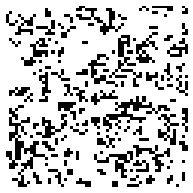

FPS: 10.89034221548991
0.04164427099749446


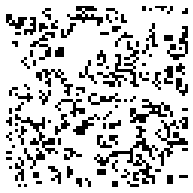

FPS: 10.843475462668202
0.041813021001871675


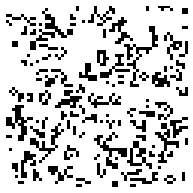

FPS: 10.684117391116594
0.040642186999320984


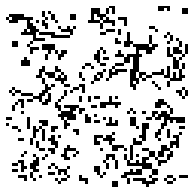

FPS: 10.855123773221482
0.041600519994972274


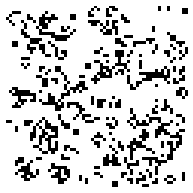

FPS: 10.754856605617514
0.04205208300118102


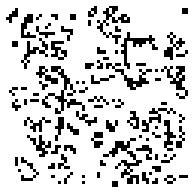

FPS: 9.993857975058352
0.04307343799882801


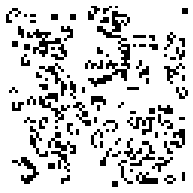

FPS: 10.82074191244104
0.04129322899825638


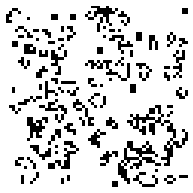

FPS: 10.690720731686973
0.04290677099925233


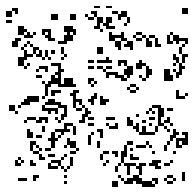

FPS: 10.607793357122645


In [3]:
# Play the game in real time with sequential frames
initialize()
draw()
frame = 0
while frame < 10:
    frame += 1
    Canvas = update(Canvas)
    draw()

0


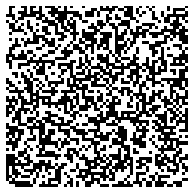

FPS: 17.593050744267526
FPS: 29.150534760133297
FPS: 10.51242599822372
FPS: 10.151264396734403
FPS: 10.502362996177105
FPS: 10.485385919745816
FPS: 10.26419609610257
FPS: 10.550899830110627
FPS: 10.496391901961477
FPS: 7.0150055599112155
FPS: 10.625463555428773
FPS: 9.674883567793952
FPS: 10.197036521625302
FPS: 10.377985751792977
FPS: 10.102285743715377
FPS: 10.194654177772469
FPS: 10.458826631888778
FPS: 10.552813460098491
FPS: 10.251700677450845
FPS: 9.898284828838792
FPS: 10.43285487053232
FPS: 10.397994036520112
FPS: 10.572105022161166
FPS: 10.347113263288344
FPS: 9.817657433873208
FPS: 10.51271377697882
FPS: 10.484355412172462
FPS: 9.976047012410419
FPS: 10.635351427916
FPS: 10.623993682200494
FPS: 9.725064263878856
FPS: 9.85191342640794
FPS: 10.33424834495527
FPS: 10.08392772353572
FPS: 10.084669167442357
FPS: 10.070282311931818
FPS: 9.89864206279258
FPS: 9.968278147443783
FPS: 10.273587800495447
FPS: 9.668355209011434
FPS: 10.161848575575977
FPS: 10.420115073309352
FPS: 9.97744

FPS: 10.409607109187819
FPS: 10.33819919598015
FPS: 10.722363253730526
FPS: 10.426452653761672
FPS: 10.42209494984074
FPS: 9.75738667874164
FPS: 6.838118258720399
FPS: 10.331579117218666
FPS: 10.476975192347144
FPS: 10.169814856411527
FPS: 10.49042759599355
FPS: 10.169491664439878
FPS: 10.121510761567567
FPS: 10.070440617668305
FPS: 10.38337356899823
FPS: 10.201154109900752
FPS: 10.34884218707112
FPS: 10.367226766145615
FPS: 10.173209574749748
FPS: 10.167229782107972
FPS: 9.96869212527101
FPS: 10.000156302527209
FPS: 10.522912014672844
FPS: 10.692090119638685
FPS: 10.113087579430044
FPS: 10.216189484812713
FPS: 10.171107628022758
FPS: 10.211136486463069
FPS: 10.380734942498552
FPS: 10.474517426148925
FPS: 10.524873215867382
FPS: 10.650395248305724
FPS: 10.378602708638539
FPS: 10.406786073055954
FPS: 10.746429243497131
FPS: 10.669511869967131
FPS: 10.127650424851549
FPS: 10.641304946175138
FPS: 10.720627271947857
FPS: 10.448126738995
FPS: 10.222118142688046
FPS: 10.615535227538869
FPS: 

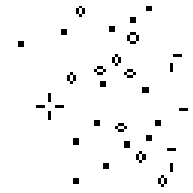

In [10]:
# Play the game but wait for results
initialize()
draw()
frame = 0
save("out"+str(frame)+".png")
while frame < 500:
    frame += 1
    Canvas = update(Canvas)
    save("out"+str(frame)+".png")

In [11]:
Frames = []
print("Frames:", len(ImageStream))
for i in ImageStream:
    newFrame = Image.open(i)
    Frames.append(newFrame)
Frames[0].save('life9.gif', format='GIF',
               append_images=Frames[1:],
               save_all=True,
               duration=3, loop=0)

Frames: 501


Remember to **update this markdown block** for best view!
![](life9.gif)

Hope you enjoy this mini-project!

## References

1. [Creating Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html#sphx-glr-tutorials-colors-colormap-manipulation-py)

2. [Workaround about global variables](https://careerkarma.com/blog/python-local-variable-referenced-before-assignment/#:~:text=The%20UnboundLocalError%3A%20local%20variable%20referenced%20before%20assignment%20error,is%20declared%20before%20you%20assign%20it%20a%20value.)

3. [PNG to GIF using PIL](https://pythonprogramming.altervista.org/png-to-gif/)

4. Official documentations.